## Hypothesis: I think that people with prior coding experience which is defined as two months and above are more likely to believe they will get an A in comp 110 than those with none to less than one months of experience.


First I will read in the csv file and convert it into a column-oriented data table.

In [150]:
%reload_ext autoreload
%autoreload 2

In [151]:
from data_utils import read_csv_rows, columnar

data_rows: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
columns: dict[str, list[str]] = columnar(data_rows)

I will then select the prior_experience and grade section. This will give the first 10 rows.

In [152]:
from data_utils import select, head
from tabulate import tabulate
data_select: dict[str, list[str]] = select(columns, ["prior_exp", "grade"])
tabulate(head(data_select, 10), data_select.keys(), "html")

prior_exp,grade
1-2 years,A
2-6 months,B
2-6 months,B
2-6 months,A
7-12 months,A
1-2 years,A
7-12 months,A
None to less than one month!,C
7-12 months,B
2-6 months,A


Now I have to count the totals of each.

In [144]:
from data_utils import count

experience_counts: dict[str, int] = count(data_select["prior_exp"])
print(f"experience_counts: {experience_counts}")

grade_counts: dict[str, int] = count(data_select["grade"])
print(f"grade_counts: {grade_counts}")

experience_counts: {'1-2 years': 16, '2-6 months': 119, '7-12 months': 25, 'None to less than one month!': 332, 'Over 2 years': 10}
grade_counts: {'A': 237, 'B': 211, 'C': 47, 'D': 7}


Now we are going to use a mask called high_achievers that prints true when a grade is an A and lists false when a grade is not an A.

In [145]:
def high_achievers(col: list[str], threshold: str) -> list[bool]:
    result: list[bool] = []
    for item in col:
        result.append(item ==  threshold)


    return result

show_off_mask: list[bool] = high_achievers(columns["grade"], 'A')
print(show_off_mask)


[True, False, False, True, True, True, True, False, False, True, False, True, True, True, True, True, False, False, False, False, False, True, False, True, False, False, False, True, True, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, True, True, True, False, False, True, True, True, True, True, False, True, False, False, False, True, False, False, False, False, False, True, False, False, True, True, False, False, False, False, False, True, True, True, False, False, True, False, True, True, True, True, False, False, False, False, True, False, True, False, False, True, True, True, False, True, True, False, False, True, True, True, False, False, True, True, True, True, False, True, True, False, True, True, False, False, True, True, True, False, True, True, True, True, False, True, False, True, True, False, False, False, False, True, False, True, True, True, False, False, False, True, False, False, False, False, False, False,

This function will allow us to filter the masked data and show us the amount of people in each experience group that think they will get an A. 

In [146]:
def mask_on(col: list[str], mask: list[bool]) -> list[str]:
    result: list[str] = []
    for i in range(len(mask)):
        if mask[i]:
            result.append(col[i])
    return result

good_grades_with_experience: list[str] = mask_on(columns["prior_exp"], show_off_mask)
print(good_grades_with_experience)


['1-2 years', '2-6 months', '7-12 months', '1-2 years', '7-12 months', '2-6 months', '2-6 months', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!', '2-6 months', 'None to less than one month!', 'None to less than one month!', '2-6 months', 'None to less than one month!', 'None to less than one month!', '7-12 months', '2-6 months', 'None to less than one month!', 'None to less than one month!', '2-6 months', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!', '2-6 months', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!', '7-12 months', '1-2 years', 'Over 2 years', 'None to less than one month!', 'None to less than one month!', 'Non

Now we need to count how many people in each experience group feel that they will earn an A.

In [147]:
from data_utils import count

experience_grade: dict[str, int] = count( good_grades_with_experience)
print(f"experience_grade: {experience_grade}")




experience_grade: {'1-2 years': 14, '2-6 months': 59, '7-12 months': 19, 'None to less than one month!': 137, 'Over 2 years': 8}


I then want to import a barplot to visually show my data. 

<BarContainer object of 4 artists>

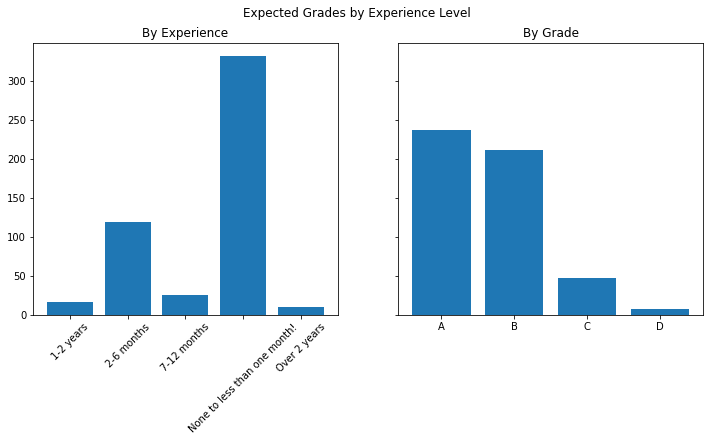

In [148]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle("Expected Grades by Experience Level")


axes[0].set_title("By Experience")
axes[0].bar(experience_counts.keys(), experience_counts.values())
axes[0].tick_params(axis='x', labelrotation = 45)

axes[1].set_title("By Grade")
axes[1].bar(grade_counts.keys(), grade_counts.values())

# Conclusion
Based on the evidence provided, my hypothesis was correct. A larger proportion of people with 2 months or more of coding experience expect to get an A in comp 110 than those with 1 month or less. 100 out of the total 170 people with 2 or months of experience expect an A while only 137 out of the total 332 people with 1 month or less experience plan on getting an A. This data makes since as those with prior experience may have a better grasp of the content much quicker than those with no experience because of the familiarity and they may know different techniques of coding not taught in class.